## Probability Plots

In [20]:
# Imp
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

x = np.linspace(-5, 5, 1000)

In [24]:
def plot_normal(x_data, mu =0, sigma = 1, cdf = False, **kwargs):
    
    '''
    Plot the normal distribution function for a given x range
    If mean (mu) and standard deviation (sigma) are not provided, the standard normal is plotted
    If cdf=True, then not only the probability density function, but also the 
    cumulative distribution functions are plotted.
    Pass any other keyword arguments under the matplotlib plot function
    '''
    
    x = x_data
    if cdf:
        y = stats.norm.cdf(x, mu, sigma)
    else:
        y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
    plt.ylabel('Probability density')
    

### Probability Density Plot

The area under the probability density curve between two points corresponding to the probability that the variable (normal distribution) falls between those two values. In other words, the area under the PDF between a and b (a<b) equals to P(a < x < b).

Since the total probability for a random variable x to fall for the entire interval from negative infinity to infinity is 1. That is the reason why the area under the PDF is always 1.



### Cumulative Distribution function

The cumulative distribution function - cumulative probability

The y-axis of the CDF w.r.t x = a represents P(negative infinity < x <= a). 

You can subtract the probability of CDF y-axis at b, by probability of CDF y-axis at a to find out the probability between two points.

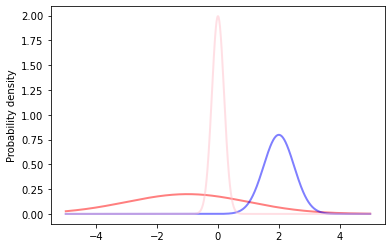

In [26]:
# color specify the line color
# lw specifies the width of the line
# ls specifies the line style
# alpha specifies the transparency

plot_normal(x, -1, 2, color = 'red', lw = 2, ls = '-', alpha = 0.5)
plot_normal(x, 2, 0.5, color = 'blue', lw = 2, ls = '-', alpha = 0.5)
plot_normal(x, 0, 0.2, color = 'pink', lw = 2, ls = '-', alpha = 0.5)

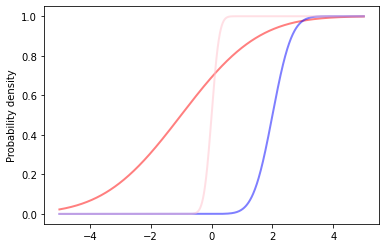

In [27]:
plot_normal(x, -1, 2,cdf=True, color = 'red', lw = 2, ls = '-', alpha = 0.5)
plot_normal(x, 2, 0.5,cdf = True, color = 'blue', lw = 2, ls = '-', alpha = 0.5)
plot_normal(x, 0, 0.2, cdf = True, color = 'pink', lw = 2, ls = '-', alpha = 0.5)

In [32]:
def plot_beta(x_data, a, b, mu =0, sigma = 1, cdf = False, **kwargs):
    
    '''
    Plot the beta distribution function for a given x range
    Input: number of success (a - 1), and number of failure (b - 1)
    If mean (mu) and standard deviation (sigma) are not provided, the standard beta is plotted
    If cdf=True,  cumulative distribution functions are plotted.
    Pass any other keyword arguments under the matplotlib plot function
    '''
    
    x = x_data
    if cdf:
        y = stats.beta.cdf(x, a, b, mu, sigma)
    else:
        y = stats.beta.pdf(x, a, b, mu, sigma)
    plt.plot(x, y, **kwargs)
    plt.ylabel('Probability density')

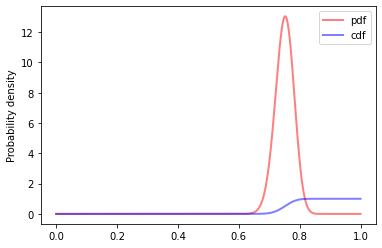

In [38]:
x = np.linspace(0, 1, 1000)

# Property of beta: a / (a + b)
plot_beta(x, 150, 50, 0, 1, color = 'red', lw = 2, ls = '-', alpha = 0.5, label = 'pdf')
plot_beta(x, 150, 50, 0, 1, cdf= True, color = 'blue', lw = 2, ls = '-', alpha = 0.5, label = 'cdf')
plt.legend()

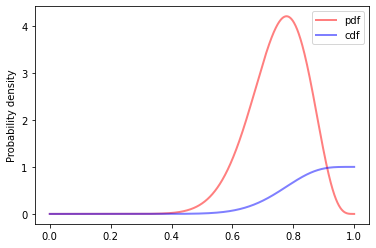

In [39]:
plot_beta(x, 15, 5, 0, 1, color = 'red', lw = 2, ls = '-', alpha = 0.5, label = 'pdf')
plot_beta(x, 15, 5, 0, 1, cdf= True, color = 'blue', lw = 2, ls = '-', alpha = 0.5, label = 'cdf')
plt.legend()

### F-distribution

In [41]:
def plot_f(x_range, dfn, dfd, mu=0, sigma=1, cdf= False, **kwargs):
    '''
    Plots the f distribution function for a given x range, dfn and dfd
    If mu and sigma are not provided, standard f is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = stats.f.cdf(x, dfn, dfd, mu, sigma)
    else:
        y = stats.f.pdf(x, dfn, dfd, mu, sigma)
    plt.plot(x, y, **kwargs)

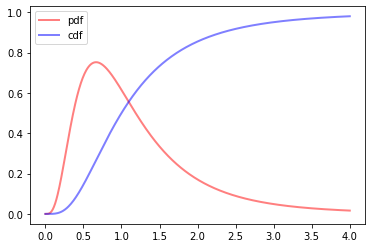

In [43]:
x = np.linspace(0.001, 4, 500)

plot_f(x, 10, 10, 0, 1,  color='red', lw=2, ls='-', alpha=0.5, label='pdf' )
plot_f(x, 10, 10, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend()

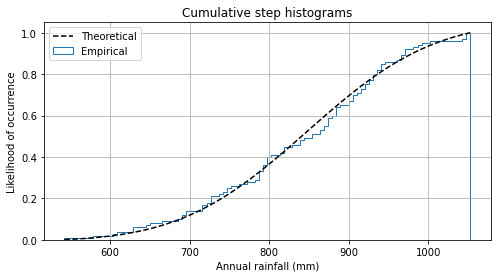

In [55]:
# Ann Arbor precipitation
mu = 850
sigma = 125
n_bins = 100
x = np.random.normal(mu, sigma, size = 100)

# Create fig, ax
fig, ax = plt.subplots(figsize = (8,4))

# Plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density = True, 
                          histtype = 'step',
                          cumulative = True,
                          label = 'Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

# cumsum() returns the cumulative distribution of a variable
y=  y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth = 1.5, label = 'Theoretical')

# Tidy up the figure
ax.grid(True)
ax.legend(loc = 'upper left')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

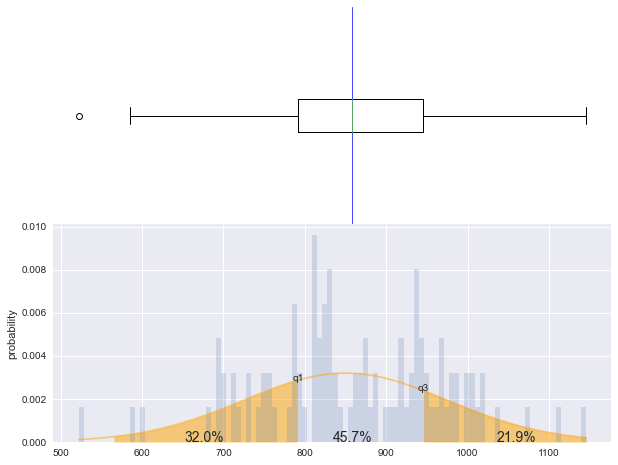

In [111]:
# Ann Arbor precipitation
plt.style.use('seaborn')
mu = 850
sigma = 125
n_bins = 100
x = np.random.normal(mu, sigma, size = 100)

# Create fig, ax
# sharex option enables user to avoid specifying x axis for every single plot generated
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex= True, figsize = (10,8))

# Plot the histogram
n, bins, patches = axes[1].hist(x, n_bins, density = True, alpha = .2)

# np.percentile
median, q1, q3 = np.percentile(x, 50), np.percentile(x, 25), np.percentile(x, 75)
pdf = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2))
#print(median, q1, q3)

# PDF
axes[1].plot(bins, pdf, color = 'orange', alpha = .5)

IQR = q3 - q1

# Subset bins
bins_1 = bins[(bins >= q1 - 1.5 * IQR) & (bins <= q1)]
#print(bins_1)
bins_2 = bins[(bins >= q3) & (bins <=  q3 + 1.5 * IQR)]

pdf_1 = pdf[:int(len(pdf)/2)]
pdf_1 = pdf_1[(pdf_1 >= stats.norm(mu,sigma).pdf(q1 - 1.5 * IQR)) & (pdf_1 <= stats.norm(mu,sigma).pdf(q1))]
pdf_2 = pdf[int(len(pdf)/2):]
pdf_2 = pdf_2[(pdf_2 >= stats.norm(mu,sigma).pdf(q3 + 1.5 * IQR)) & (pdf_2 <= stats.norm(mu,sigma).pdf(q3))]

# Fill the values between Q1 - 1.5 * IQR and Q1
# Fill the values between Q3 and Q3 + 1.5 * IQR

# fill_between(x, y1, y2)
axes[1].fill_between(bins_1, pdf_1, 0, alpha=  .5, color = 'orange')
axes[1].fill_between(bins_2, pdf_2, 0, alpha=  .5, color = 'orange')

# Add text to the graph
# Middle point of q1 - 1.5 * IQR, q1
axes[1].annotate("{:.1f}%".format(100*stats.norm(mu, sigma).cdf(q1)), xy = (((2 * q1 - 1.5 * IQR))/2, 0), 
                 ha = 'center', fontsize = 14)
# Median
axes[1].annotate("{:.1f}%".format(100*stats.norm(mu, sigma).cdf(q3) - 100*stats.norm(mu, sigma).cdf(q1)), xy = (median,0), 
                 ha = 'center', fontsize = 14)
axes[1].annotate("{:.1f}%".format(100*stats.norm(mu, sigma).cdf(q3 + 1.5 * IQR) - 100*stats.norm(mu, sigma).cdf(q3)), 
                 xy = (((2 * q3 + 1.5 * IQR))/2, 0), ha = 'center', fontsize = 14)
axes[1].annotate('q1', xy = (q1, stats.norm(mu, sigma).pdf(q1)), ha = 'center')
axes[1].annotate('q3', xy = (q3, stats.norm(mu, sigma).pdf(q3)), ha = 'center')
axes[1].set_ylabel('probability')


# Boxplot
axes[0].boxplot(x, 0, vert=False)
# Indicate the median in the boxplot
axes[0].axvline(median, color = 'blue', alpha = 0.7, linewidth = 1)
# Mute the axis
axes[0].axis('off')

plt.subplots_adjust(hspace = 0)

plt.show()

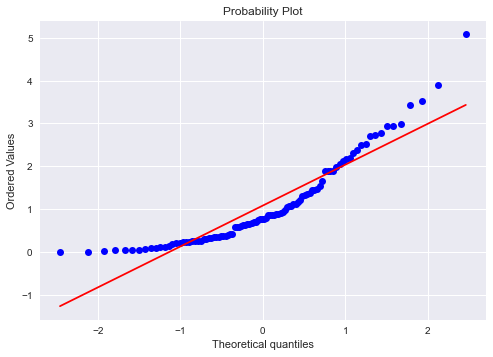

In [109]:
import statsmodels.api as sm
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows = 1, ncols = 1)

data = np.random.exponential(1, 100)
x = np.linspace(-3,3, 100)
(osm, osr), (slope, intercept, r) = stats.probplot(data, dist = stats.norm, plot = ax)
# ax.set_ylim(-4, 4) 

y = x * slope + intercept
# # Fill between two horizontal curves
# ax.fill_between(x, -2, 2, alpha = 0.1)